# Lecture 12: Diffusion and Phase Behavior
---

In [1]:
import sys
sys.path.append("/pithy/code")
from pithy import *
from scipy.special import erf,erfc
import io
import base64
from IPython.display import HTML
from commands import getoutput as go

%matplotlib inline

### Boltzmann: Bridging Time and Space
---

The diffusion relationship invokes variability in time and space, but the inherent link between Fick's 1st and 2nd laws provides a way to normalize to a single variable to study trends. This is called the Boltzmann Substitution.

if we take that 

$$y = \frac{x}{\sqrt{t}} $$

then writing the 2nd law,

$$\left(\frac{\partial C}{\partial x} \right)_t = -\left(\frac{y}{2t}\right)\left(\frac{\partial C}{\partial y}\right)_t$$


$$\left(\frac{\partial C}{\partial x} \right)_t = \left(\frac{1}{\sqrt{t}}\right)\left(\frac{\partial C}{\partial y}\right)_t$$

$$\left(\frac{\partial^2C}{\partial^2x} \right)_t = \left(\frac{1}{t}\right)\left(\frac{\partial^2 C}{\partial^2 y}\right)_t$$


$$-\frac{y}{2}\frac{\partial C}{\partial y} = \frac{\partial }{\partial y}\left(D\frac{\partial C}{\partial y}\right)$$


Now let's examine this effect through different condition, all where $D$ is not a function of $C$.


## Phase Separation
----

So we've discussed the thermodynamics of mixing by assigning a mixing coefficient we call the activity

$$ a_i = \lambda_i x_i $$

and we can approximate this effect by

$$ \ln(\lambda_1) =  \alpha x_2^2 $$
$$ \ln(\lambda_2) =  \alpha x_1^2 $$

So

$$ \Delta G^\text{mix} = R_gT\sum_i x_i\ln(\lambda_i) + \Delta G^\text{mix,id}$$

and for a binary mixture

$$ \Delta G^\text{mix} = R_gT\alpha x_1 x_2 + \Delta G^\text{mix,id}$$




And we then motivated this:

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in multiply



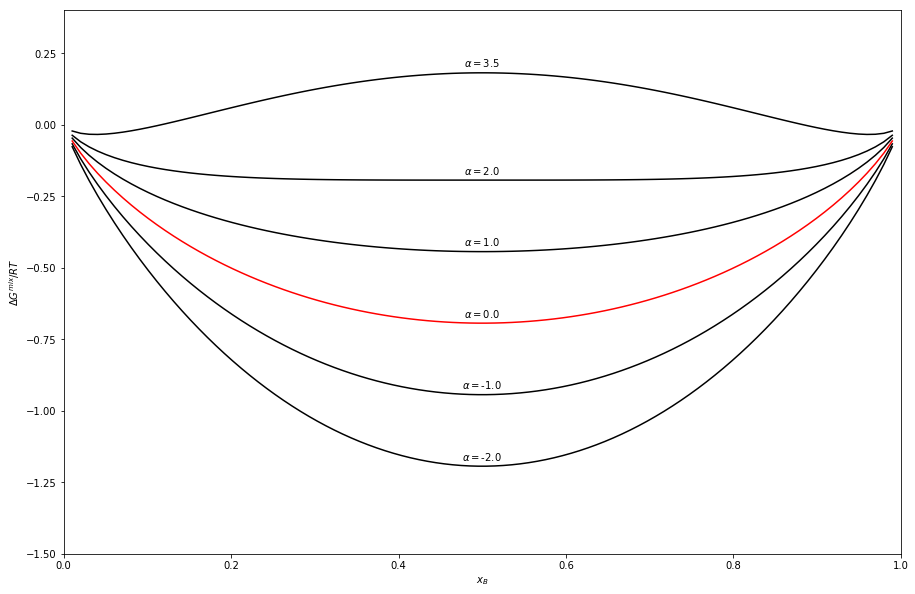

In [2]:
R = 8.31415 # J/K mol
T = 298 # K

xa = linspace(0,1,100)
xb = 1-xa


figure(figsize=(15,10))
for i in [-2,-1,0,1,2,3.5]:
    alpha = i

    DeltaHmix =  R*T*alpha*xa*xb
    DeltaSmix = - R*(xa*log(xa)+xb*log(xb))
    DeltaGmix = DeltaHmix - T*DeltaSmix

    Gmm = (DeltaGmix)/(R*T)
    color = 'k'
    if i == 0: color ='r'
    plot(xb,Gmm,color)
    mid = Gmm[len(Gmm)/2]
    annotate('$\\alpha = $%.1f'%i,xy=(.5,mid+.02),ha='center')

ylim(-1.5,.4)
xlim(0,1)
    
    
ylabel("$\Delta G^{mix}/RT$")
xlabel("$x_B$")    
show()

So what _happens_ when the phase separates like this?

Well, let's think about what the competing forces are:

The species have some want to demix because there is an energetic penalty for this existence.
The species have some want to mix because entropy motivates this.

How would temperature change this? Well recall

$$\alpha = \frac{zN_A\Delta U}{R_g T} $$

And we saw above that as alpha reaches 2, we are at the critical point, 

$$T_C \approx = \frac{zN_A\Delta U}{2R_g}$$

so, assuming a constant $\Delta U$ with T, a dangerous assumption but lets be wild.... 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

invalid value encountered in multiply



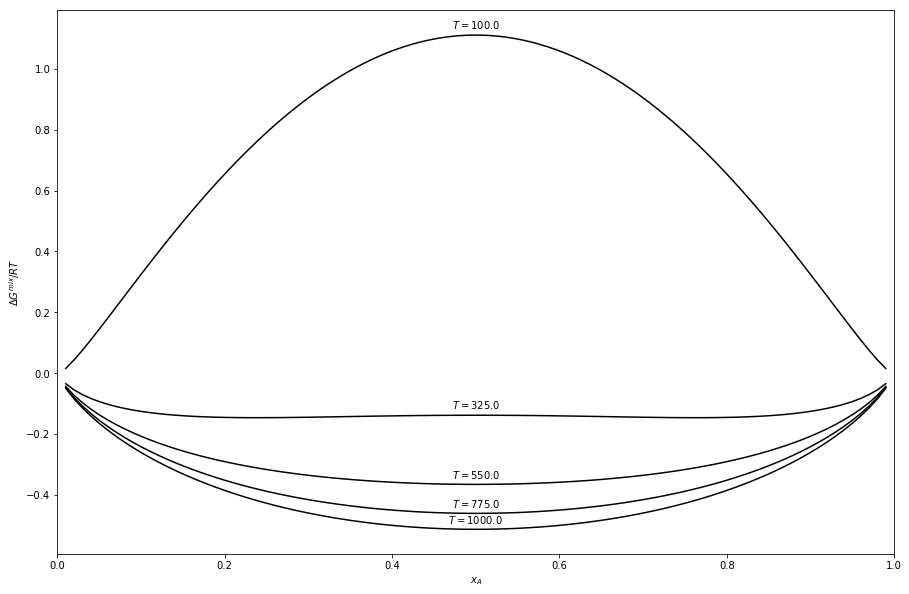

In [3]:
R = 8.31415 # J/K mol
T = 298 # K

xa = linspace(0,1,100)
xb = 1-xa

Na = 10
delU = 100
z = 6
def alphaf(T):
    return z*Na*delU/(R*T)

Ts = linspace(100,1000,5)

figure(figsize=(15,10))
for T in Ts:
    alpha = alphaf(T)

    DeltaHmix =  R*T*alpha*xa*xb
    DeltaSmix = - R*(xa*log(xa)+xb*log(xb))
    DeltaGmix = DeltaHmix - T*DeltaSmix

    Gmm = (DeltaGmix)/(R*T)
    color = 'k'
    if i == 0: color ='r'
    plot(xb,Gmm,color)
    mid = Gmm[len(Gmm)/2]
    annotate('$T = $%.1f'%T,xy=(.5,mid+.02),ha='center')

#ylim(-1.5,.4)
xlim(0,1)
    
    
ylabel("$\Delta G^{mix}/RT$")
xlabel("$x_A$")    
show()

Now let's explore $\frac{\partial G}{\partial x}$ at various $T$

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in multiply



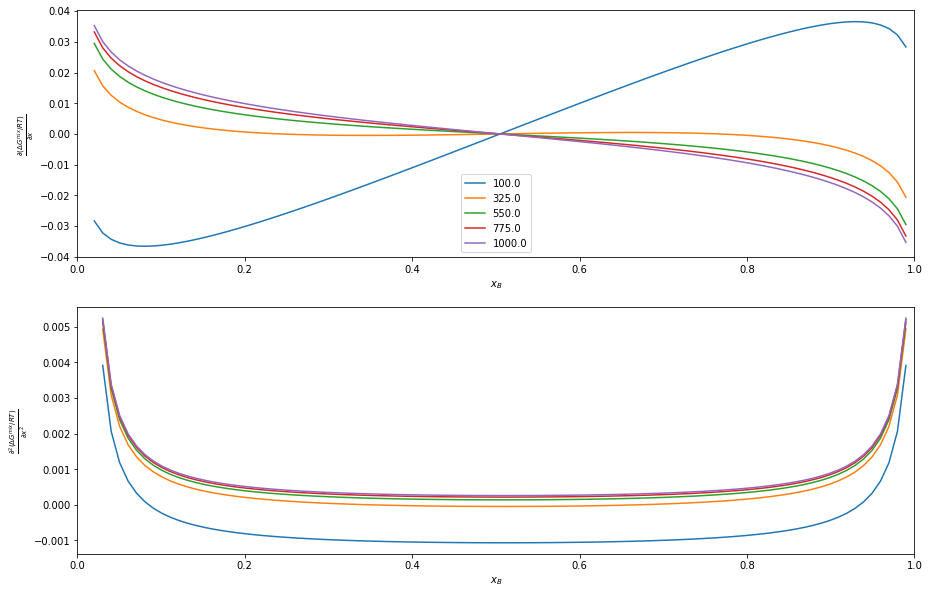

In [5]:
figure(figsize=(15,10))
for T in Ts:
    alpha = alphaf(T)

    DeltaHmix =  R*T*alpha*xa*xb
    DeltaSmix = - R*(xa*log(xa)+xb*log(xb))
    DeltaGmix = DeltaHmix - T*DeltaSmix

    Gmm = (DeltaGmix)/(R*T)
    dG = diff(Gmm)
    ddG = diff(dG)
    if i == 0: color ='r'
    subplot(2,1,1)
    plot(xb[:-1],dG,label=str(T))
    subplot(2,1,2)
    plot(xb[:-2],ddG,)
 
#ylim(-1.5,.4)
subplot(2,1,1)
legend()
xlim(0,1)   
ylabel("$\\frac{\partial(\Delta G^{mix}/RT)}{\partial x}$")
xlabel("$x_B$")    
subplot(2,1,2)
xlim(0,1)   
ylabel("$\\frac{\partial^2(\Delta G^{mix}/RT)}{\partial x^2}$")
xlabel("$x_B$")    
show()

So we see that we go from two minima to one minimum as a function of temperature. As we cool, we have a driving force to phase separate.  If we plot the ideal compositions as a function of temperature....

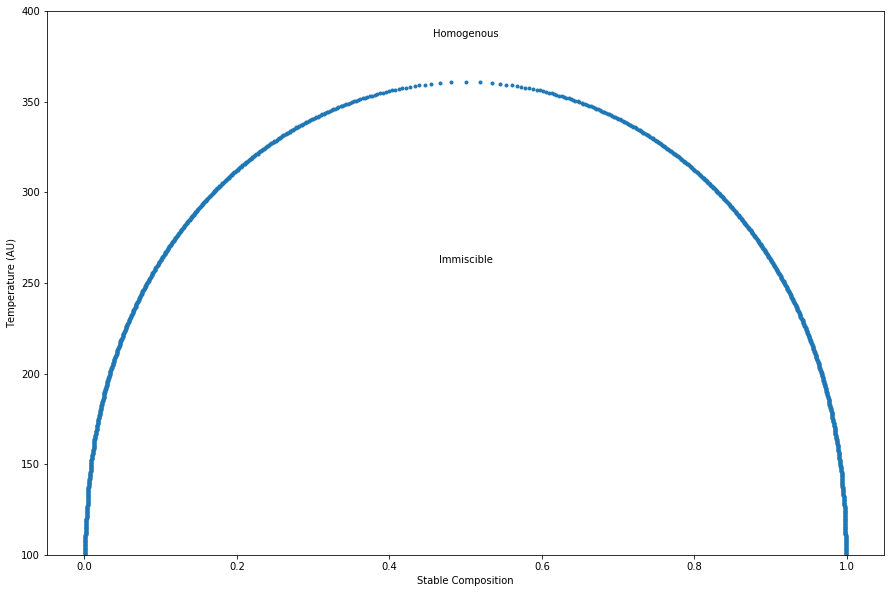

In [5]:
R = 8.31415 # J/K mol
T = 298 # K

xa = linspace(.001,.9999,1000)
xb = 1-xa

Na = 10
delU = 100
z = 6
def alphaf(T): return z*Na*delU/(R*T)

Ts = linspace(100,500,1000)

figure(figsize=(15,10))
phase = []
Tnew = []
spin = []
Tspin = []
Tc =  z*Na*delU/(2*R)

##code the phase envelope and the spinode

for T in Ts:
    alpha = alphaf(T)

    DeltaHmix =  R*T*alpha*xa*xb
    DeltaSmix = - R*(xa*log(xa)+xb*log(xb))
    DeltaGmix = DeltaHmix - T*DeltaSmix

    Gmm = (DeltaGmix)/(R*T)
    dGmm = diff(Gmm)
    
    mini  = min(Gmm)  #cheat to find minimum values
    mini2 = min(dGmm)
    for x in range(len(xb)):
        if Gmm[x] == mini and T < Tc : 
            phase.append(xb[x])
            phase.append(1-xb[x])
            Tnew.append(T)
            Tnew.append(T)
        if x < len(dGmm):
            if dGmm[x]== mini2 and (xb[x] != 0 or xb[x]!=1):
                spin.append(xb[x])
                spin.append(1-xb[x])
                Tspin.append(T)
                Tspin.append(T)


        
Tnew.append(Tc)
phase.append(.5)
Tspin.append(Tc)
spin.append(.5)


ylim([100,400])
plot(phase,Tnew,'.')
#plot(spin,Tspin,'.')

xlabel("Stable Composition")
ylabel("Temperature (AU)")
annotate("Homogenous",xy=(.5,Tc+25),ha="center")
annotate("Immiscible",xy=(.5,Tc-100),ha="center")

show()

So we can estimate the free energy of the solution as a taylor series...

$$G(c) = G(c_0)+(c-c_0)\frac{\partial G}{\partial c}|_{c_0} + \frac{(c-c_o)^2}{2}\frac{\partial^2 G}{\partial c^2}|_{c_0} + ...$$

and in regions there will be small fluctuations due to entropy, so...
$$\Delta G = \frac{1}{2}[G(c_0+\Delta c)+G(c_0-\Delta c)] - G(c_0)$$ 

So the change in energy can be approximated as

$$\Delta G \approx \frac{(\Delta c)^2}{2} \frac{\partial^2 G}{\partial c^2}|_{c_0}  $$


So if 

$$0>\frac{\partial^2 G}{\partial c^2}|_{c_0}$$

The solution goes unstable


 

## The Cahn Model of Diffusion and Phase Behavior

<img src="http://steingart.princeton.edu/sharetron/Screen-Shot-2017-10-18-at-12.49.59-PM.png">


$$\Delta G \approx \frac{(c-c_0)^2}{2} \frac{\partial^2 G}{\partial c^2}|_{C_0} + \kappa (\nabla c)^2 $$


$$\Lambda = \frac{2\pi}{\beta} > \frac{2\pi}{\beta_C}  $$


$$A(\beta,t) = A(\beta,0)e^{R(\beta)t}$$


What this says, qualtiatvely, from scherer, page 175:

>- Separation within the spinodal curve
 - Uphill diffusion creates numerous fluctuations with Λ ≈ 1 - 10 nm
 - Amplitude of fluctuation increases, while wavelength remains constant 
 - Compositions of regions approach spinode
- After entering binodal region
 - Diffusion - controlled growth begins
 - Separated regions grow as Λ ~ t1/3
 - Compositions of regions approach binode (no nucleation event is required, because the compositions of the phases are already sufficiently different to satisfy the criterion for growth)
- As composition stabilizes
 - Coarsening driven by surface energy
 - Smaller particles dissolve and larger particles grow

This is best visualized.  Let's do it.
Special thanks to https://documents.epfl.ch/users/f/fi/fiocco/www/JournalClubFiles/ModelB.pdf


Let's start with system with some immiscibility

![Screen%20Shot%202018-10-22%20at%201.20.48%20PM.png](attachment:Screen%20Shot%202018-10-22%20at%201.20.48%20PM.png)

When we drop the temperature, we get a mixture determined by the composition

![Screen%20Shot%202018-10-22%20at%201.27.24%20PM.png](attachment:Screen%20Shot%202018-10-22%20at%201.27.24%20PM.png)


![Screen%20Shot%202018-10-22%20at%201.27.44%20PM.png](attachment:Screen%20Shot%202018-10-22%20at%201.27.44%20PM.png)


So how do we determine what this will _really look_ like?

Well, the system will be driven by a mixture of enthalpy, entropy, and an interfacial penaly.

We bound by entropy, such that:

$$ ds = \frac{1}{T}du - \frac{\mu}{T}d\phi$$

where $\phi$ is phase fraction

We can then motivate the flux contributions of energy and mass as:

$$J_u = D_{uu}\nabla\frac{1}{T} - D_{u\phi}\nabla\frac{\mu}{T} $$
$$J_\phi = D_{\phi u}\nabla\frac{1}{T} - D_{\phi\phi}\nabla\frac{\mu}{T} $$


Assume isothermal, so only:

$$J_\phi = - D_{\phi\phi}\nabla\frac{\mu}{T} $$

And define $\mu$ as our phase contribution as a function of position

$$\mu(r) \equiv \frac{\delta F(\phi)}{\delta \phi(r)}$$ 

And Fick's second law applys, so

$$\frac{\partial \phi}{\partial t} = -\nabla J_{\phi}$$

Put this all together, and we get the Cahn-Hilliard equation

$$\frac{\partial \phi}{\partial t} = \nabla \dot D_{\phi\phi}\nabla\frac{\frac{\delta F(\phi)}{\delta \phi(r,t)}}{T} $$

The choice of $F(\phi)$ is crucial and hard. We will use the Landau Ginzburg assumption 

$$F(\phi) = \int f(\phi(r)) dr + \frac{\epsilon}{2}(\nabla\phi(r))^2 $$

> The free energy density f is that of the uniform system with the same φ

> There’s a penalty for gradients in the order parameter(interfaces)


We then discretize and turn into a numercial approximation below


In [15]:
from pylab import *
from numpy import *
import os

N=100 #lattice points per axis
dt=1 #timestep
dx=1 #lattice spacing

mx = 1000*dt
t=arange(0,mx,dt)#timesteps

a= 5.0#coefficient of the Landau−Ginzburg free energy density
every=10#dump an image every

epsilon = 50#interface penalty
phi0=.5#initial mean value of the order parameter
noise=0.10 #initial amplitude of thermal fluctuations in the order parameter

th=phi0*ones((N,N))+noise*(rand(N,N)-0.5)#initial conditions


x,y=meshgrid(fftfreq(th.shape[0],dx),fftfreq(th.shape[1],dx))
k2=(x*x+y*y)
df=lambda th,a:4*a*th*(1-th)*(1-2*th)#derivative off
def update(th,dt,a,k2):#performonestepofsemi−implicititeration
    return ifft2((fft2(th)-dt*k2*fft2(df(th,a)))/(1+2*epsilon*dt*k2**2))

ims = []
dird = "/anim/"
go("rm -rf "+dird)
os.mkdir(dird)
for i in range(size(t)):
    if mod(i,every)==0:
        print str(int(t[i]/float(mx)*100))+'%',
        im = imshow(abs(th),cmap=cm.gray,vmin=0.0,vmax=1.0,animated=True)
        colorbar()
        title("$\epsilon$ = " +str(epsilon))
        savefig(dird+'t'+str(i/every).zfill(3)+'.png',dpi=100)
        clf()
    th=update(th,dt,a,k2)

go("mkdir /stores/")
ok = go("ffmpeg -f image2 -r 15 -i /anim/t%03d.png  -y /anim/movie.mp4")
video = io.open('/anim/movie.mp4', 'r+b').read()
encoded = base64.b64encode(video)
go("cp /anim/movie.mp4 /stores/ep%i.mp4"%epsilon)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))


0% 1% 2% 3% 4% 5% 6% 7% 8% 9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 28% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 56% 57% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99%

<Figure size 432x288 with 0 Axes>

In [9]:
video = io.open('/stores/ep500.mp4', 'r+b').read()
encoded = base64.b64encode(video)
go("cp /anim/movie.mp4 /stores/ep%i.mp4"%epsilon)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))
